In [34]:
from __future__ import print_function
import zipfile
import os
import numpy as np
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F
import imgaug.augmenters as iaa


# data augmentation for training and test time
# Resize all images to 32 * 32 and normalize them to mean = 0 and standard-deviation = 1 based on statistics collected from the training set

data_transforms = transforms.Compose([
	# transforms.Resize((32, 32)),
    # LocalContrastNorm,
    iaa.Sequential([
        iaa.Resize(32),
        iaa.AllChannelsCLAHE(),
    ]).augment_image,
    transforms.ToTensor(),
    transforms.Normalize((0.3337, 0.3064, 0.3171), ( 0.2672, 0.2564, 0.2629))
])

img_transforms = transforms.Compose([
	# transforms.Resize((32, 32)),
    # LocalContrastNorm,
    iaa.Sequential([
        iaa.Resize(32),

        # iaa.CLAHE(tile_grid_size_px=8,tile_grid_size_px_min=8),
    ]).augment_image,
])

img_transforms2 = transforms.Compose([
	# transforms.Resize((32, 32)),
    # LocalContrastNorm,
    iaa.Sequential([
        iaa.Resize(32),
        iaa.pillike.Equalize(),
    ]).augment_image,
])

import cv2

def image_brightness_normalisation(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return image


data_transforms3 = transforms.Compose([
	transforms.Resize((32, 32)),
    # LocalContrastNorm,
    # iaa.Sequential([
    #     iaa.Resize(32),
    #     iaa.CLAHE(),
    # ]).augment_image,
    image_brightness_normalisation,
])



In [2]:
from __future__ import print_function
import argparse
from tqdm import tqdm
import os
import PIL.Image as Image

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision.datasets as datasets
import numpy as np
from data import initialize_data # data.py in the same folder
from model import Net
import torchvision

import pandas as pd


In [4]:

test_dir = '/workspace/gtsrb_pytorch/data/test_images'

def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')


In [5]:
import matplotlib.pyplot as plt

  0%|          | 24/12631 [00:00<00:40, 308.31it/s]


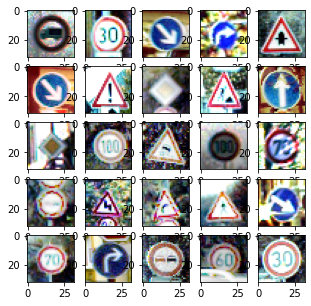

In [32]:
transforms = [img_transforms2]


fig, axs = plt.subplots(5,5,figsize=(5,5))
count = 0
for f in tqdm(sorted(os.listdir(test_dir))):
    if 'ppm' in f:
        for i in range(0,len(transforms)):
            # data = transforms[i](np.array(pil_loader(test_dir + '/' + f)))
            data = transforms[i](np.array(pil_loader(test_dir + '/' + f)))
            # data = image_brightness_normalisation(np.array(pil_loader(test_dir + '/' + f)))
        
        axs[count//5,count%5].imshow(data)
        
        count+=1
    
    if count > 24:
        break
fig.show()


  0%|          | 24/12631 [00:00<00:22, 548.39it/s]


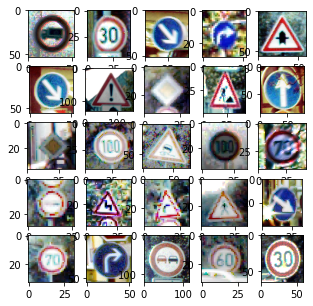

In [36]:
transforms = [img_transforms2]
transforms = [data_transforms3]


fig, axs = plt.subplots(5,5,figsize=(5,5))
count = 0
for f in tqdm(sorted(os.listdir(test_dir))):
    if 'ppm' in f:
        for i in range(0,len(transforms)):
            # data = transforms[i](np.array(pil_loader(test_dir + '/' + f)))
            # data = transforms[i](np.array(pil_loader(test_dir + '/' + f)))
            data = image_brightness_normalisation(np.array(pil_loader(test_dir + '/' + f)))
        
        axs[count//5,count%5].imshow(data)
        
        count+=1
    
    if count > 24:
        break
fig.show()